### Canal Phase FLIP NÃO MARKOVIANO

In [1]:
from sympy import *
import numpy as np

init_printing(use_unicode=True)
from matplotlib import pyplot as plt
%matplotlib inline
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct
import scipy.interpolate
import platform

In [2]:
def cb(d, j):
    cbs = zeros(d,1); cbs[j] = 1
    return cbs
def proj(psi):
    return psi*Dagger(psi)

def coh_l1(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C

def Pauli(j):
    if j == 0:
        return Matrix([[1,0],[0,1]])
    elif j == 1:
        return Matrix([[0,1],[1,0]])
    elif j == 2:
        return Matrix([[0,-1j],[1j,0]])
    elif j == 3:
        return Matrix([[1,0],[0,-1]])

In [42]:
import sys as s

def werner_state(c1, c2, c3):
    # c = [-0.8,-0.8,-0.8]
    c = [c1, c2, c3]
    index = 0
    rho = np.zeros((4,4),dtype=complex)
    for i in range(len(rho)):
        rho[i,i] = 1
    for i in c:
        index += 1
        rho += TensorProduct(i*Pauli(index),Pauli(index))
    print(np.array(rho,dtype=complex))
werner = werner_state(-0.8, -0.8, -0.8)

[[ 0.2+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  1.8+0.j -1.6+0.j  0. +0.j]
 [ 0. +0.j -1.6+0.j  1.8+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0.2+0.j]]


In [48]:
def werner_state(c1, c2, c3):
    state = Matrix([[1+c3, 0, 0, c1-c2],
                    [0, 1-c3, c1+c2, 0],
                    [0,c1+c2, 1-c3, 0],
                    [c1-c2, 0, 0, 1+c3]])
    return state

ana_costa = werner_state(-0.8,-0.8,-0.8)

Mais=(cb(2,0)+cb(2,1))/sqrt(2)
Menos=(cb(2,0)-cb(2,1))/sqrt(2)
print(type(Mais))

<class 'sympy.matrices.dense.MutableDenseMatrix'>


In [49]:
print(type(ana_costa))

<class 'sympy.matrices.dense.MutableDenseMatrix'>


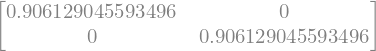

In [50]:
def K_0(alpha,J):
    return sqrt(exp(-alpha*J)*(cos(J/2)+alpha*sin(J/2)))*Pauli(0)

K_0(0.01,1.2)

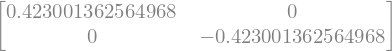

In [51]:
def K_1(alpha,J):
    return sqrt(1-exp(-alpha*J)*(cos(J/2)+alpha*sin(J/2)))*Pauli(3)

K_1(0.01,1.2)

In [52]:
#ação do canal no estado |+><+| J É O TEMPO
def RHO_t_NM(state,J):
    return K_0(0.01,J)*proj(state)*K_0(0.01,J).T + K_1(0.01,J)*proj(state)*K_1(0.01,J).T

RHO_t_NM(werner_state(-0.8,-0.8,-0.8),1.2)

ShapeError: Matrix size mismatch: (2, 2) * (4, 4).

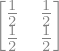

In [7]:
RHO_t_NM(0)

In [8]:
coh_l1(RHO_t_NM(0))

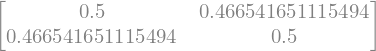

In [9]:
RHO_t_NM(0.5)

In [10]:
coh_l1(RHO_t_NM(0.5))

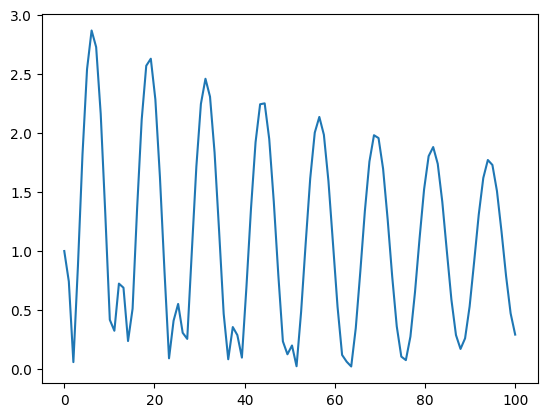

In [11]:
t = np.linspace(0,100,100)
y = [coh_l1(RHO_t_NM(i)) for i in t]
plt.plot(t,y)
plt.show()